In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alldata = pd.read_csv('../data/medications.csv')

In [3]:
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])

# alldata.head(10)
alldata['START'] = pd.to_datetime(alldata['START'])

# print(len(alldata))

In [ ]:
alldata.head()

In [ ]:
totalcost = alldata['TOTALCOST']

x_vals = np.linspace(min(totalcost), max(totalcost), 100)  # Generate x values


insurancepayout = totalcost * alldata['COVERAGE_RATIO']
plt.figure()
plt.plot(totalcost, insurancepayout, '.', ms = 1.5)
plt.plot(x_vals, x_vals, 'r--', label='y = x ')
# plt.plot(x_vals, 0.8 * x_vals , 'y--', label='y = 0.8x')
# plt.plot(x_vals, 0.6 * x_vals , 'k--', label='y = 0.6x')
plt.plot(x_vals, 0.2 * x_vals , 'g--', label='y = 0.2x')
plt.plot(x_vals, 0.01 * x_vals , 'p--', label='y = 0.01x')
plt.title('Total Cost vs Insurance Payout Over Time')
plt.ylabel('Total Cost Customer')
plt.xlabel('Insurance')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
maxtotal = totalcost.max()
maxinsurance = insurancepayout.max()
print(maxtotal)
print(maxinsurance)

In [ ]:
alldata['YYMM'] = alldata['START'].dt.to_period("Y")

medcost_py = alldata.groupby(['YYMM', 'DESCRIPTION'])['BASE_COST'].sum().reset_index()
print(medcost_py.head())
medcost_py['YYMM'] = medcost_py['YYMM'].astype(str)
medcost_py['YYMM'] = pd.to_datetime(medcost_py['YYMM'])
plt.figure()
print(len(medcost_py['BASE_COST']),len(medcost_py['BASE_COST'][1:]))
basecost = medcost_py['BASE_COST'].values
y = []
for i in range(len(basecost)):
    if i ==0: continue
    y.append(((basecost[i]-basecost[i-1])/basecost[i]) * 100)

plt.plot(medcost_py['YYMM'].iloc[1:], y)
plt.title("Cost Trend of Medications Over Time")
plt.ylabel("Base Cost ($)")
plt.xlabel("Time Year")
# plt.yscale('log')
plt.xticks(rotation=45)
# plt.legend(title="Medication", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside
plt.show()

In [ ]:
#pre processing the data
from datetime import  date
patients = pd.read_csv('../data/patients.csv')
patients['DEATHDATE'] = patients['DEATHDATE'].fillna(date.today())

#calculate age of patients
years = np.floor((pd.to_datetime(patients['DEATHDATE']) - pd.to_datetime(patients['BIRTHDATE'])).dt.days/365.25)

patients['AGE'] = years



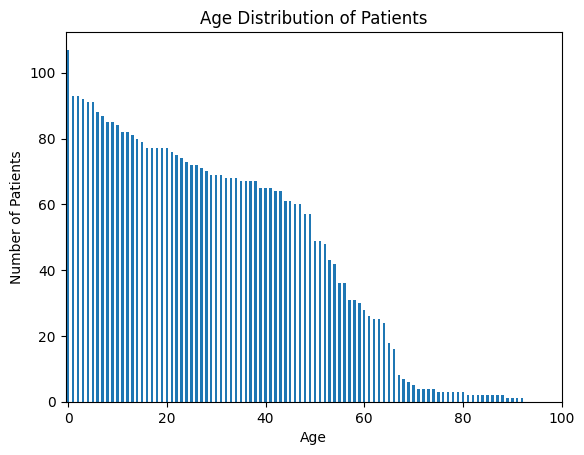

In [ ]:
#Age distribution of patients
ages = patients['AGE'].value_counts()
ages.plot(kind = 'bar')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
ticks = np.linspace(0, 100, num=6)  # Adjust num as needed
plt.xticks(ticks=ticks, labels=[str(int(tick)) for tick in ticks], rotation = 360)
plt.show()
